# Machine Learning & Statistics Project 2020
By Kevin Dooley

In [1]:
## import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm

#### Load Dataset
To be able to give an overview of the dataset, I had to first obtain it. Copied and saved the dataset from Moodle as a CSV file in my repository. This was saved as powerproduction.csv and was the basis of the project.

In [2]:
df = pd.read_csv("powerproduction.csv") #read the csv file using pandas
df # called the dataset df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
print("Rows x Columns:", df.shape)

Rows x Columns: (500, 2)


The powerproduction.csv has two variables: speed and power. There are also 500 rows in the dataset.

In [4]:
# glance at data - show first 5 rows
df.head()


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [5]:
# glance at data - show last 5 rows
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [6]:
# glance at data - show 15 rows
df.sample(15)

,speed,power
409,20.270,95.012
167,8.208,7.785
434,21.847,103.922
433,21.822,103.268
418,20.771,96.341
422,21.071,96.348
458,23.123,101.654
22,0.976,2.064
179,8.959,5.554
363,18.268,90.751


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


By using these simple functions it is easy to do a overview comparision for both variables of the dataset. These functions do not really tell us much information but they do familarise us with the dataset. The first observation to make from the above is that there appears to be a power output of 0 when in fact there was substantial windspeed. This will need to be investigated further but you could make a reasonable assumption that there was an issue or downtime during these periods. 

In [8]:
#describe function to show statistical summary of the dataset
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The statistical summary above gives us a top level look at the dataset. It can be seen that that the average wind speed is 12.59 and the average power output is 48.01.

### Plot Dataset

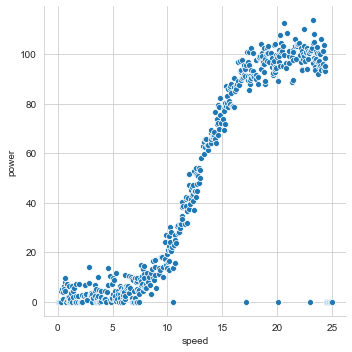

In [9]:
# https://seaborn.pydata.org/generated/seaborn.relplot.html
sns.set_style('whitegrid')
sns.relplot(x="speed", y="power",data=df)


Text(0.5, 1.0, 'Wind Speed vs Generated Power ')

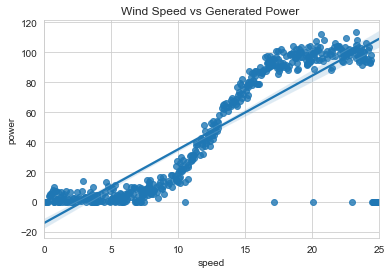

In [10]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=df)
reg.set_title("Wind Speed vs Generated Power ")

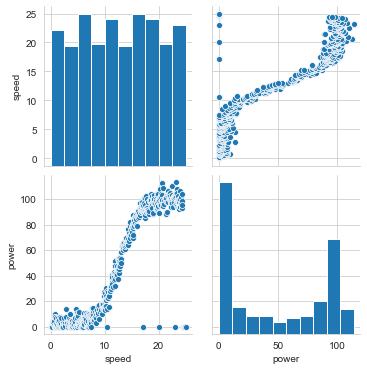

In [11]:
sns.pairplot(df)

The above relationship plots are clearing indicating that there are some outliers in the dataset. As mentioned above, the values for power generated are 0 when the wind speed is up to 25 which indicates there was downtime either due to a known/unknown issue or maintenance. 

In [12]:
# adapted from https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series
# remove unexpected zeros from dataset as these will zeros will make our modelling less accurate
# show values not equal 0
zero_removed = df[(df["speed"]!=0) & (df["power"]!=0)]
zero_removed


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [13]:
# missing first zero of dataset
#need to incorporate as it is correct - 0 wind speed will give 0 output
zero_included = df[(df["speed"]==0) & (df["power"]==0)]
#zero_included

new_df = zero_included.append(zero_removed)
dataset_clean = new_df #new dataframe with zero added at the start 

Text(0.5, 1.0, 'Wind Speed vs Generated Power - Clean')

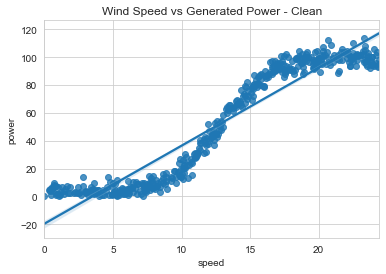

In [14]:
sns.set_style('whitegrid') 
reg = sns.regplot(x="speed", y="power",data=new_df)
reg.set_title("Wind Speed vs Generated Power - Clean")

The unexpected zero results have now been removed from the dataset. You can see from both the plot and table above, the 0 datapoints have now been removed. 

## Linear Regression

The powerproduction dataset is suitable for a regression model. Based on the plots above, it appears that a linear regression could work but may no tbe the best fit, possibly polynomial fit would be better. Linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). [4] Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). Basically that y can be calculated from a linear combination of the input variables (x). [5] In this instance, wind speed in the (x) input and power the (y) output variable. 

In [15]:
#lecture - link to repo
#create linear model instance
# adapted from https://realpython.com/linear-regression-in-python/
m = lm.LinearRegression()

In [16]:
#create x & y
x = dataset_clean["speed"]
y = dataset_clean["power"]

# x must be 2 dimensional. .reshape(-1,1) changes x to 2 dimensional (single column)
x = x.values.reshape(-1, 1)

#model to fit data
reg_model = m.fit(x,y)
reg_model

LinearRegression()

In [17]:
#intercept
m.intercept_

-19.636232996770858

In [18]:
#coefficient
m.coef_

array([5.60668469])

In [19]:
#how good is the model
m.score(x,y)

0.8983450728341917

In [20]:
#predict
predict = reg_model.predict(x)
predict

array([-19.636233  , -17.81406047, -17.39355912, -17.11322489,
       -16.82728397, -16.68711685, -16.54694973, -16.40678261,
       -16.12644838, -15.84611415, -15.70594703, -15.14527856,
       -15.00511144, -14.86494432, -14.44444297, -14.30427586,
       -14.16410874, -14.02394162, -13.74360739, -13.46327315,
       -13.18293892, -12.62227045, -12.48210333, -11.78126774,
       -11.64110063, -11.21499259, -10.37398989, -10.09365565,
        -9.11248583,  -8.97231871,  -7.43048042,  -7.15014619,
        -6.16897637,  -5.74847502,  -5.32236698,  -5.18219986,
        -4.48136428,  -3.78052869,  -3.64036157,  -3.0796931 ,
        -2.79935887,  -2.65919175,  -2.51902463,  -2.37885752,
        -1.67802193,  -0.69685211,  -0.55668499,  -0.41651787,
         0.14975728,   0.57025863,   0.71042575,   1.1309271 ,
         1.27109422,   2.25226404,   2.39243116,   2.53259827,
         2.67276539,   3.79410233,   4.49493792,   4.63510503,
         5.76204866,   5.90221577,   6.18255001,   6.88

In [21]:
#get y predict calculated manually
pred = m.intercept_ + m.coef_ * x
pred

array([[-19.636233  ],
       [-17.81406047],
       [-17.39355912],
       [-17.11322489],
       [-16.82728397],
       [-16.68711685],
       [-16.54694973],
       [-16.40678261],
       [-16.12644838],
       [-15.84611415],
       [-15.70594703],
       [-15.14527856],
       [-15.00511144],
       [-14.86494432],
       [-14.44444297],
       [-14.30427586],
       [-14.16410874],
       [-14.02394162],
       [-13.74360739],
       [-13.46327315],
       [-13.18293892],
       [-12.62227045],
       [-12.48210333],
       [-11.78126774],
       [-11.64110063],
       [-11.21499259],
       [-10.37398989],
       [-10.09365565],
       [ -9.11248583],
       [ -8.97231871],
       [ -7.43048042],
       [ -7.15014619],
       [ -6.16897637],
       [ -5.74847502],
       [ -5.32236698],
       [ -5.18219986],
       [ -4.48136428],
       [ -3.78052869],
       [ -3.64036157],
       [ -3.0796931 ],
       [ -2.79935887],
       [ -2.65919175],
       [ -2.51902463],
       [ -2

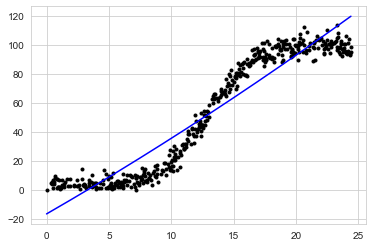

In [22]:
#link to repo lecture notes
x = dataset_clean["speed"].to_numpy()
y = dataset_clean["power"].to_numpy()

a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'b-');

In [23]:
# compare actual vs predicted power
compare = pd.DataFrame({'Actual Power': y, 'Predicted Power': predict})
compare

,Actual Power,Predicted Power
0,0.000,-19.636233
1,4.331,-17.814060
2,5.186,-17.393559
3,3.826,-17.113225
4,1.048,-16.827284
...,...,...
447,103.700,116.320264
448,93.694,116.600598
449,93.078,116.880933
450,98.223,117.021100


## Neural Networks

In [25]:
# adapted from lectures
import tensorflow.keras as kr

In [26]:
# A sequential model
model = kr.models.Sequential()

In [27]:
model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [34]:
neuron_model = model.fit(x, y, epochs=500, batch_size=10)
neuron_model 

Epoch 1/500
46/46 [==============================] - 0s 933us/step - loss: 16.6601
Epoch 2/500
46/46 [==============================] - 0s 889us/step - loss: 16.8361
Epoch 3/500
46/46 [==============================] - 0s 689us/step - loss: 16.6630
Epoch 4/500
46/46 [==============================] - 0s 821us/step - loss: 16.6806
Epoch 5/500
46/46 [==============================] - 0s 822us/step - loss: 16.6967
Epoch 6/500
46/46 [==============================] - 0s 867us/step - loss: 16.5651
Epoch 7/500
46/46 [==============================] - 0s 800us/step - loss: 16.7108
Epoch 8/500
46/46 [==============================] - 0s 756us/step - loss: 16.6369
Epoch 9/500
46/46 [==============================] - 0s 778us/step - loss: 16.6324
Epoch 10/500
46/46 [==============================] - 0s 755us/step - loss: 16.5659
Epoch 11/500
46/46 [==============================] - 0s 800us/step - loss: 16.6199
Epoch 12/500
46/46 [==============================] - 0s 778us/step - loss: 16.7044
E

46/46 [==============================] - 0s 778us/step - loss: 16.5727
Epoch 99/500
46/46 [==============================] - 0s 667us/step - loss: 16.9039
Epoch 100/500
46/46 [==============================] - 0s 733us/step - loss: 16.9597
Epoch 101/500
46/46 [==============================] - 0s 667us/step - loss: 16.6269
Epoch 102/500
46/46 [==============================] - 0s 711us/step - loss: 16.6486
Epoch 103/500
46/46 [==============================] - 0s 667us/step - loss: 16.6374
Epoch 104/500
46/46 [==============================] - 0s 733us/step - loss: 16.5637
Epoch 105/500
46/46 [==============================] - 0s 756us/step - loss: 16.6971
Epoch 106/500
46/46 [==============================] - 0s 755us/step - loss: 16.6320
Epoch 107/500
46/46 [==============================] - 0s 778us/step - loss: 16.5559
Epoch 108/500
46/46 [==============================] - 0s 689us/step - loss: 16.6713
Epoch 109/500
46/46 [==============================] - 0s 711us/step - loss: 16.

46/46 [==============================] - 0s 733us/step - loss: 16.8057
Epoch 195/500
46/46 [==============================] - 0s 644us/step - loss: 16.5902
Epoch 196/500
46/46 [==============================] - 0s 689us/step - loss: 16.5836
Epoch 197/500
46/46 [==============================] - 0s 711us/step - loss: 16.5863
Epoch 198/500
46/46 [==============================] - 0s 667us/step - loss: 16.5551
Epoch 199/500
46/46 [==============================] - 0s 711us/step - loss: 16.5778
Epoch 200/500
46/46 [==============================] - 0s 689us/step - loss: 16.6078
Epoch 201/500
46/46 [==============================] - 0s 711us/step - loss: 16.5532
Epoch 202/500
46/46 [==============================] - 0s 689us/step - loss: 16.6027
Epoch 203/500
46/46 [==============================] - 0s 667us/step - loss: 16.7341
Epoch 204/500
46/46 [==============================] - 0s 689us/step - loss: 16.5932
Epoch 205/500
46/46 [==============================] - 0s 711us/step - loss: 16

46/46 [==============================] - 0s 689us/step - loss: 16.5848
Epoch 291/500
46/46 [==============================] - 0s 711us/step - loss: 16.6029
Epoch 292/500
46/46 [==============================] - 0s 667us/step - loss: 16.5647
Epoch 293/500
46/46 [==============================] - 0s 711us/step - loss: 16.5920
Epoch 294/500
46/46 [==============================] - 0s 689us/step - loss: 16.5612
Epoch 295/500
46/46 [==============================] - 0s 689us/step - loss: 16.6263
Epoch 296/500
46/46 [==============================] - 0s 667us/step - loss: 16.5299
Epoch 297/500
46/46 [==============================] - 0s 689us/step - loss: 16.6150
Epoch 298/500
46/46 [==============================] - 0s 689us/step - loss: 16.5952
Epoch 299/500
46/46 [==============================] - 0s 711us/step - loss: 16.6157
Epoch 300/500
46/46 [==============================] - 0s 711us/step - loss: 16.5116
Epoch 301/500
46/46 [==============================] - 0s 667us/step - loss: 16

46/46 [==============================] - 0s 667us/step - loss: 16.5387
Epoch 387/500
46/46 [==============================] - 0s 756us/step - loss: 16.5203
Epoch 388/500
46/46 [==============================] - 0s 667us/step - loss: 16.5919
Epoch 389/500
46/46 [==============================] - 0s 667us/step - loss: 16.6354
Epoch 390/500
46/46 [==============================] - 0s 689us/step - loss: 16.5828
Epoch 391/500
46/46 [==============================] - 0s 667us/step - loss: 16.5401
Epoch 392/500
46/46 [==============================] - 0s 689us/step - loss: 16.5376
Epoch 393/500
46/46 [==============================] - 0s 689us/step - loss: 16.8089
Epoch 394/500
46/46 [==============================] - 0s 689us/step - loss: 16.5438
Epoch 395/500
46/46 [==============================] - 0s 711us/step - loss: 16.5780
Epoch 396/500
46/46 [==============================] - 0s 711us/step - loss: 16.5658
Epoch 397/500
46/46 [==============================] - 0s 667us/step - loss: 16

46/46 [==============================] - 0s 644us/step - loss: 16.5413
Epoch 483/500
46/46 [==============================] - 0s 711us/step - loss: 16.7960
Epoch 484/500
46/46 [==============================] - 0s 667us/step - loss: 16.5934
Epoch 485/500
46/46 [==============================] - 0s 644us/step - loss: 16.5438
Epoch 486/500
46/46 [==============================] - 0s 666us/step - loss: 16.5476
Epoch 487/500
46/46 [==============================] - 0s 689us/step - loss: 17.0390
Epoch 488/500
46/46 [==============================] - 0s 733us/step - loss: 16.6044
Epoch 489/500
46/46 [==============================] - 0s 689us/step - loss: 16.5427
Epoch 490/500
46/46 [==============================] - 0s 800us/step - loss: 16.5339
Epoch 491/500
46/46 [==============================] - 0s 711us/step - loss: 16.5157
Epoch 492/500
46/46 [==============================] - 0s 689us/step - loss: 16.6051
Epoch 493/500
46/46 [==============================] - 0s 689us/step - loss: 16

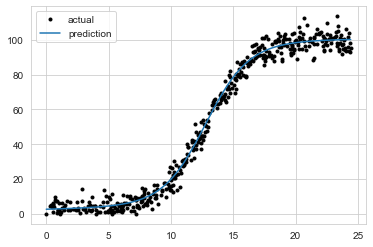

In [29]:
plt.plot(x, y,'k.', label='actual')
plt.plot(x, model.predict(x), label='prediction')
plt.legend();

### References

1. https://github.com/kevindooley/fundamentals-data-analysis-project/blob/master/tips_dataset.ipynb
2. https://seaborn.pydata.org/generated/seaborn.relplot.html
3. https://stackoverflow.com/questions/32067054/remove-rows-of-zeros-from-a-pandas-series
4. wiki
5. https://machinelearningmastery.com/linear-regression-for-machine-learning/
6. https://realpython.com/linear-regression-in-python/